In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings

In [ ]:
data_predict=pd.read_csv('/content/drive/MyDrive/Admission_Predict.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_predict.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data_predict.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
data_predict.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
152,153,321,112,5,5.0,5.0,9.06,1,0.86
351,352,325,110,4,3.5,4.0,8.67,1,0.73
298,299,330,114,3,4.5,4.5,9.24,1,0.90
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90


In [ ]:
data_predict.sample(frac=.1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
258,259,326,102,4,5.0,5.0,8.76,1,0.77
49,50,327,111,4,3.0,4.0,8.40,1,0.78
257,258,324,100,3,4.0,5.0,8.64,1,0.78
208,209,305,106,2,3.0,3.0,8.16,0,0.64
209,210,301,104,3,3.5,4.0,8.12,1,0.68
5,6,330,115,5,4.5,3.0,9.34,1,0.90
326,327,299,100,3,2.0,2.0,8.02,0,0.63
185,186,327,113,4,4.5,4.5,9.11,1,0.89
321,322,323,104,3,4.0,4.0,8.44,1,0.73
396,397,325,107,3,3.0,3.5,9.11,1,0.84


In [ ]:
data_predict.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data_predict.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data_predict=data_predict.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [ ]:
data_predict.dtypes

SerialNo              int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

In [ ]:
data_predict.shape

(400, 9)

In [ ]:
data_predict.isnull().sum()

SerialNo            0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

In [ ]:
for col in data_predict.columns:
    print(data_predict[data_predict[col].isnull()])

Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfA

In [ ]:
len(data_predict['SerialNo'].unique())

400

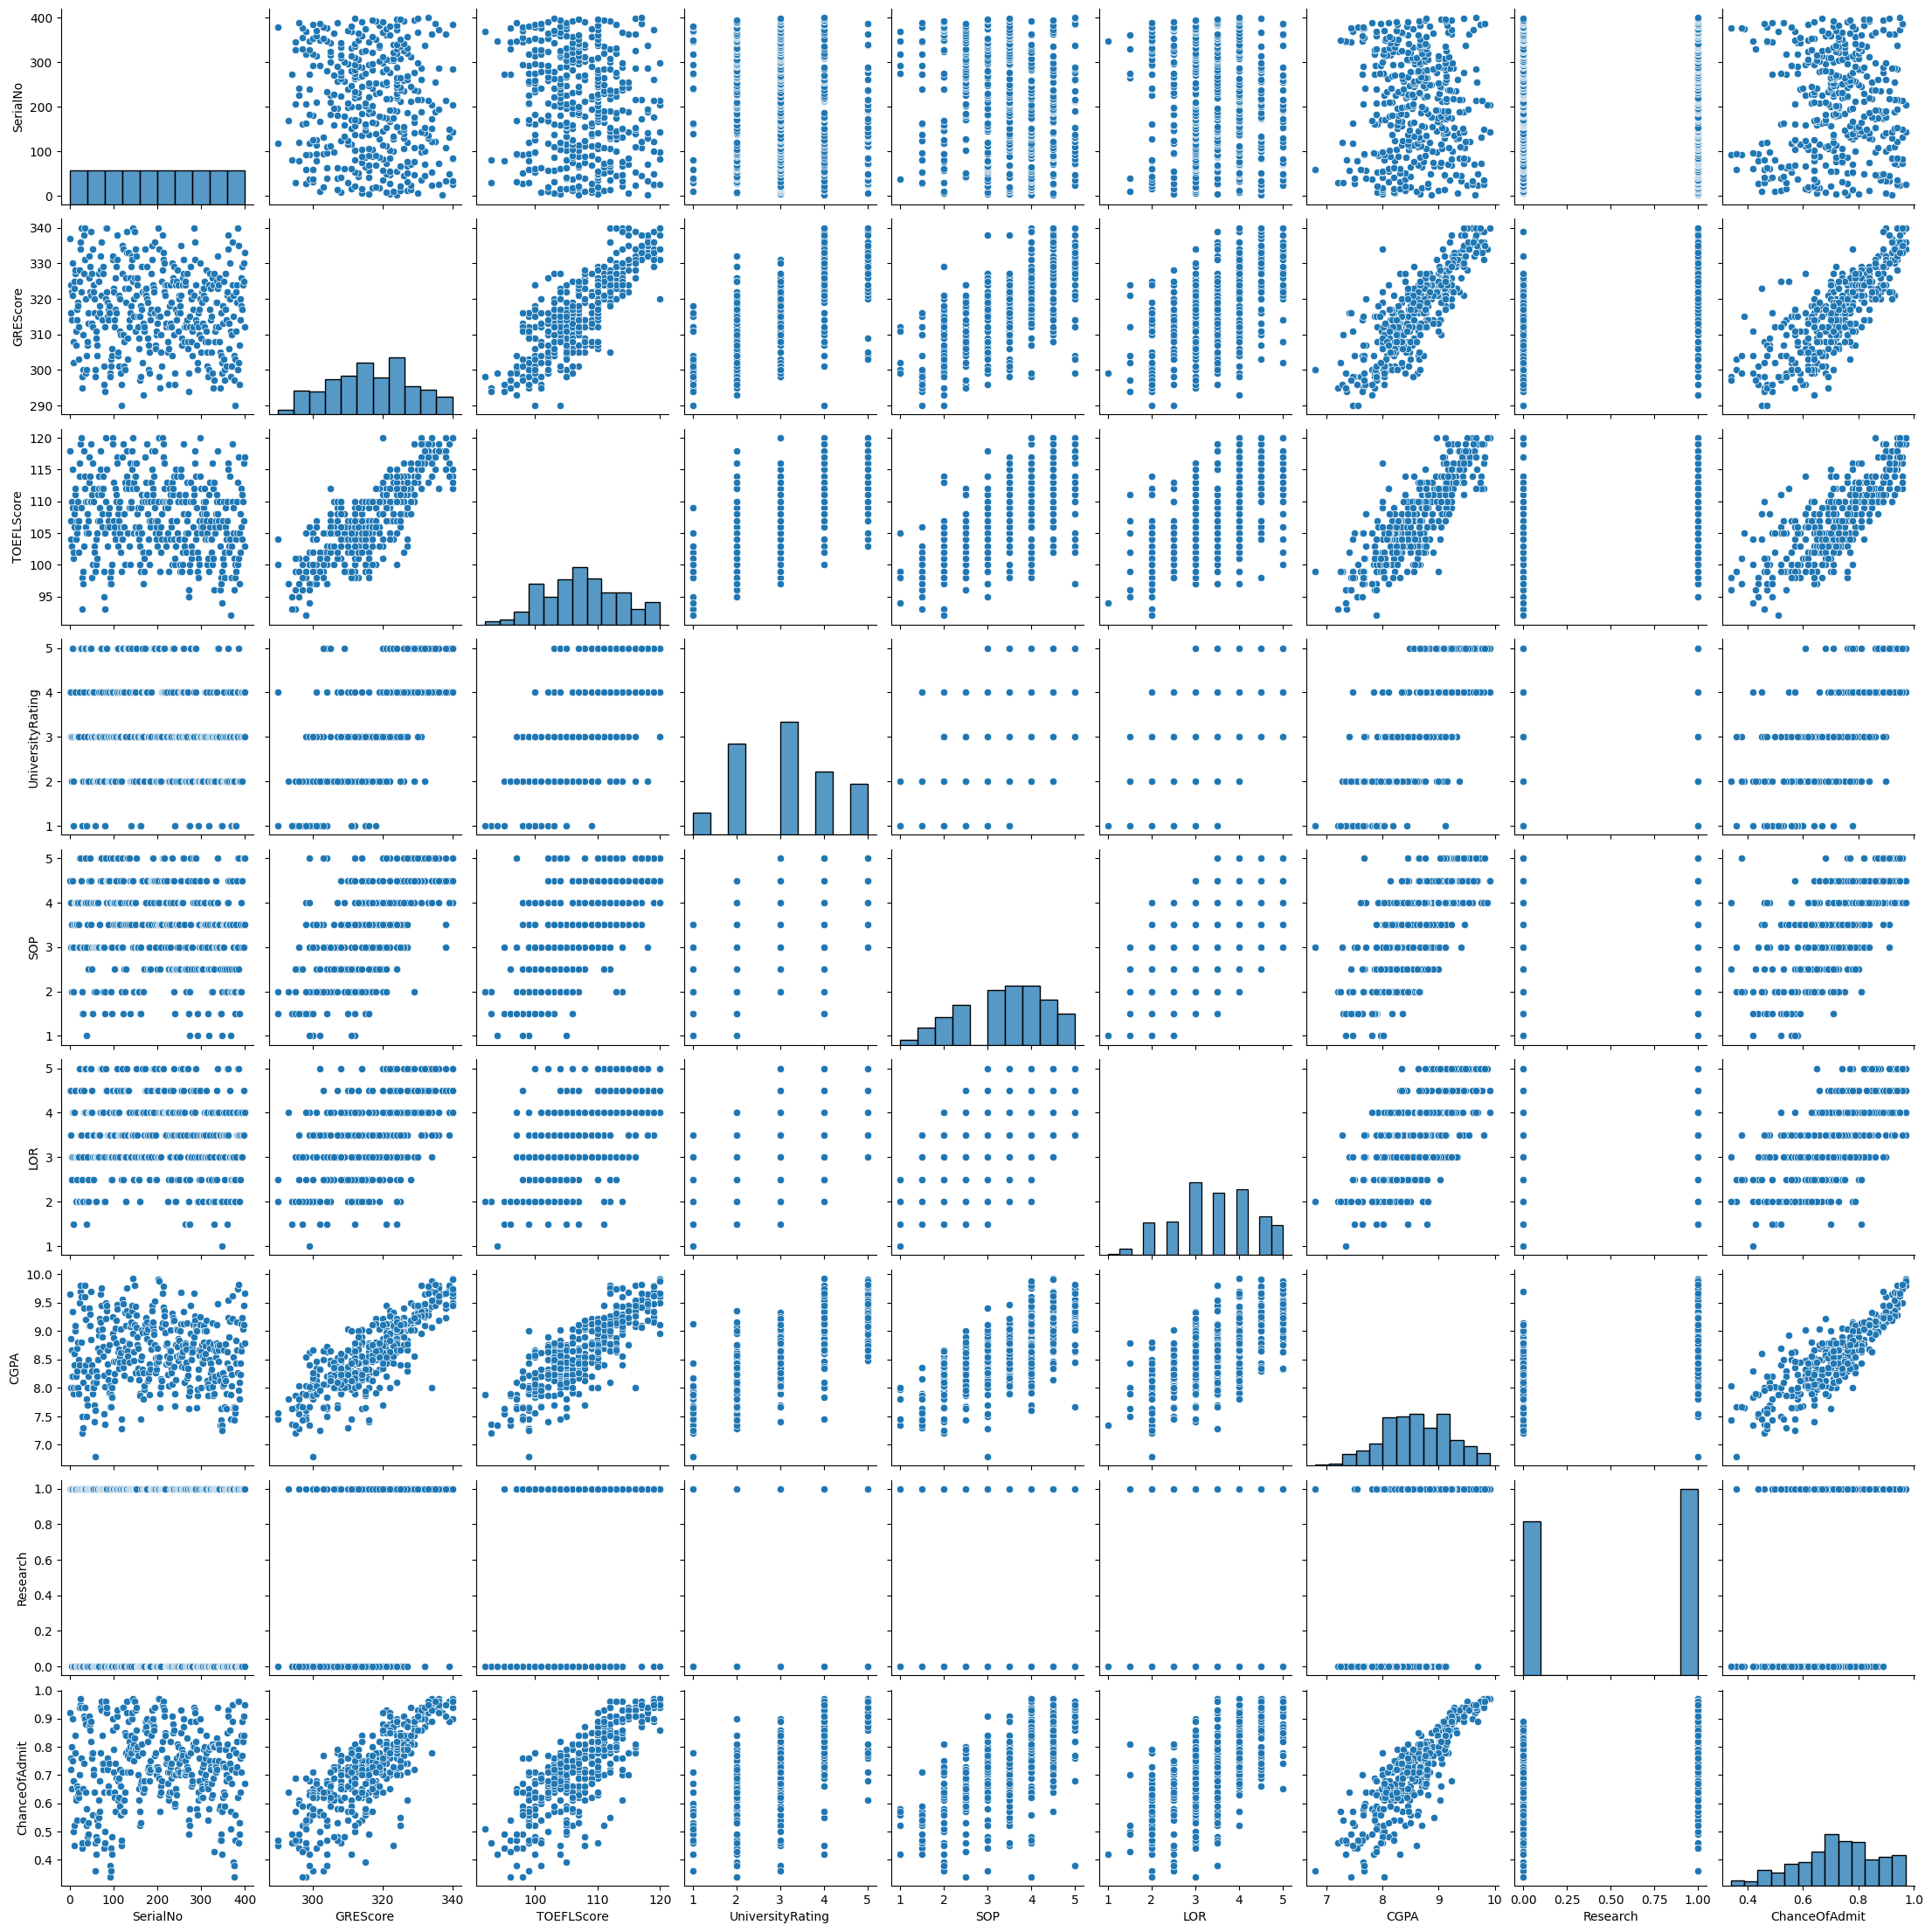

In [ ]:
sns.pairplot(data_predict)
plt.show()

<ipython-input-23-66e2a37cee9c>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


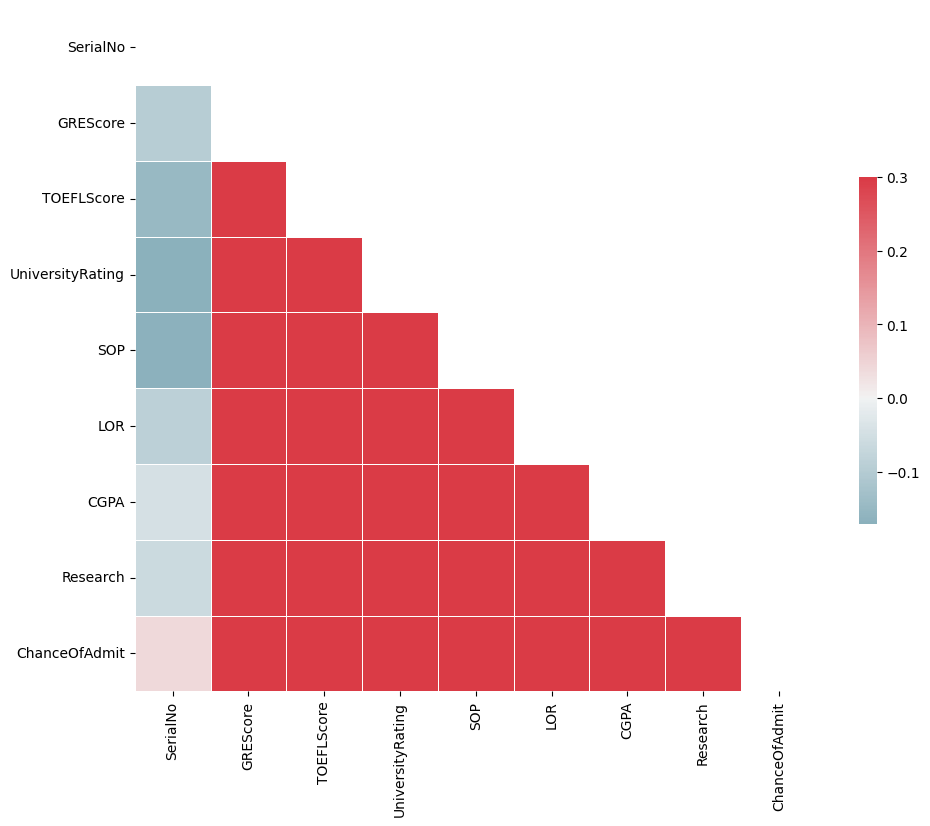

In [ ]:
corr = data_predict.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

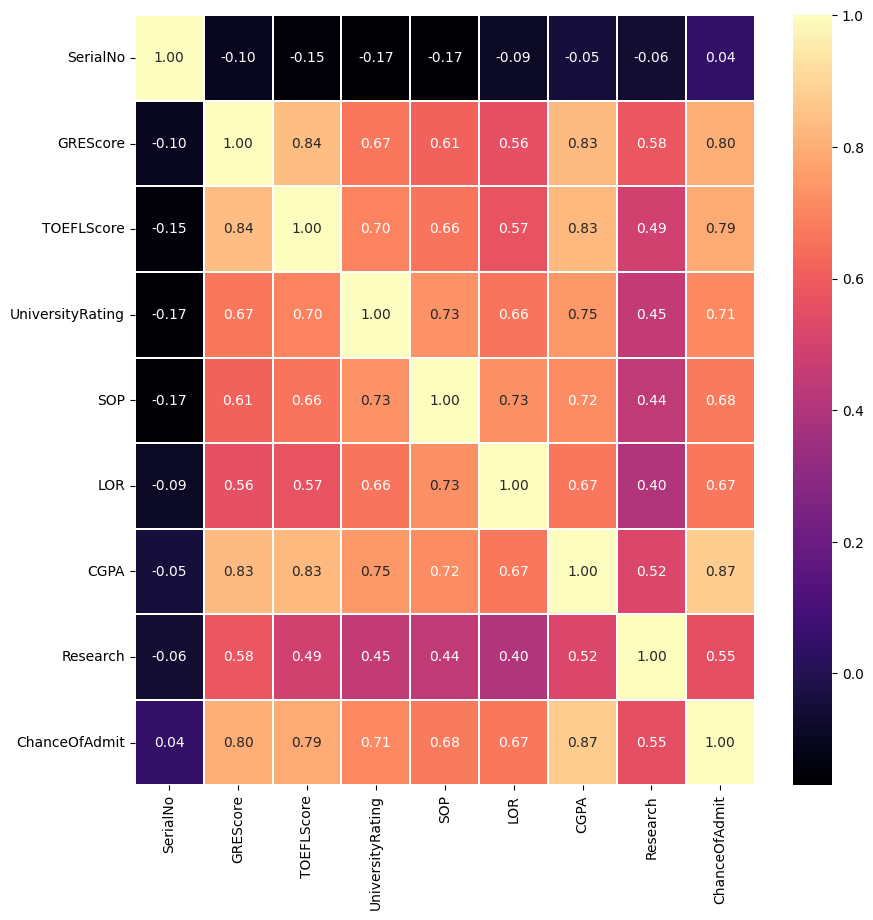

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_predict.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

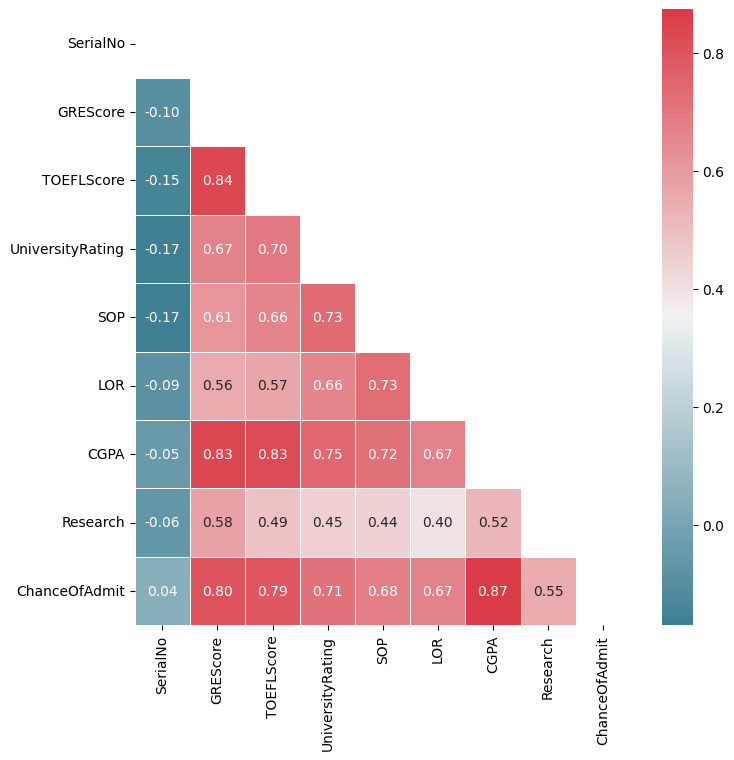

In [ ]:
corr = data_predict.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
data_predict=data_predict.drop(['SerialNo'],axis=1) 

In [ ]:
data_predict.corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
GREScore,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFLScore,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
UniversityRating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
ChanceOfAdmit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
data_predict.iloc[:,:6].corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA
GREScore,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060
TOEFLScore,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417
UniversityRating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000


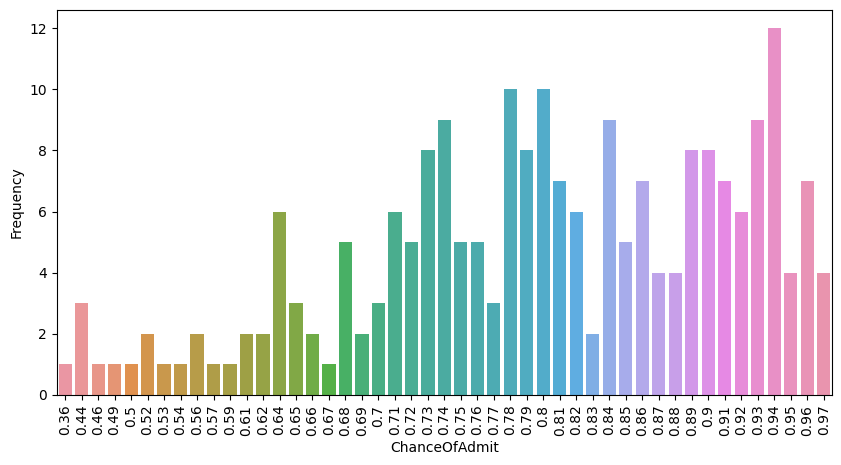

In [ ]:
plt.figure(figsize=(10,5))
research_predict=data_predict[data_predict['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

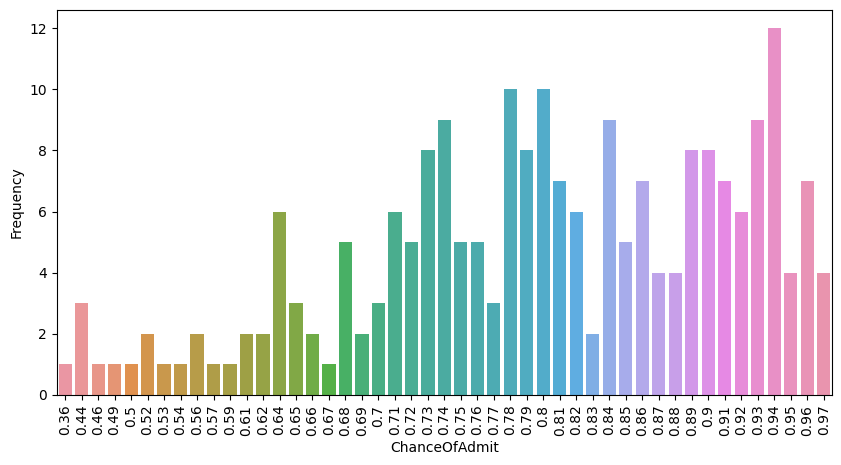

In [ ]:
plt.figure(figsize=(10,5))
research_predict=data_predict[data_predict['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
research_predict=research_predict.sort_values(ascending=True)
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_predict.head(1)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [ ]:
max(data_predict['UniversityRating'])

5

In [ ]:
filter_data=data_predict[np.logical_and(data_predict['ChanceOfAdmit']==1.0,data_predict['UniversityRating']==max(data_predict['UniversityRating']))]

In [ ]:
filter_data.groupby('UniversityRating')[['GREScore','TOEFLScore','CGPA']].mean()

,GREScore,TOEFLScore,CGPA
UniversityRating,,,


<ipython-input-35-2e0076a98802>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_predict[item], rug=True, rug_kws={"color": "b"},kde=True,
<ipython-input-35-2e0076a98802>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_predict[item], rug=True, rug_kws={"color": "b"},kde=True,
<ipython

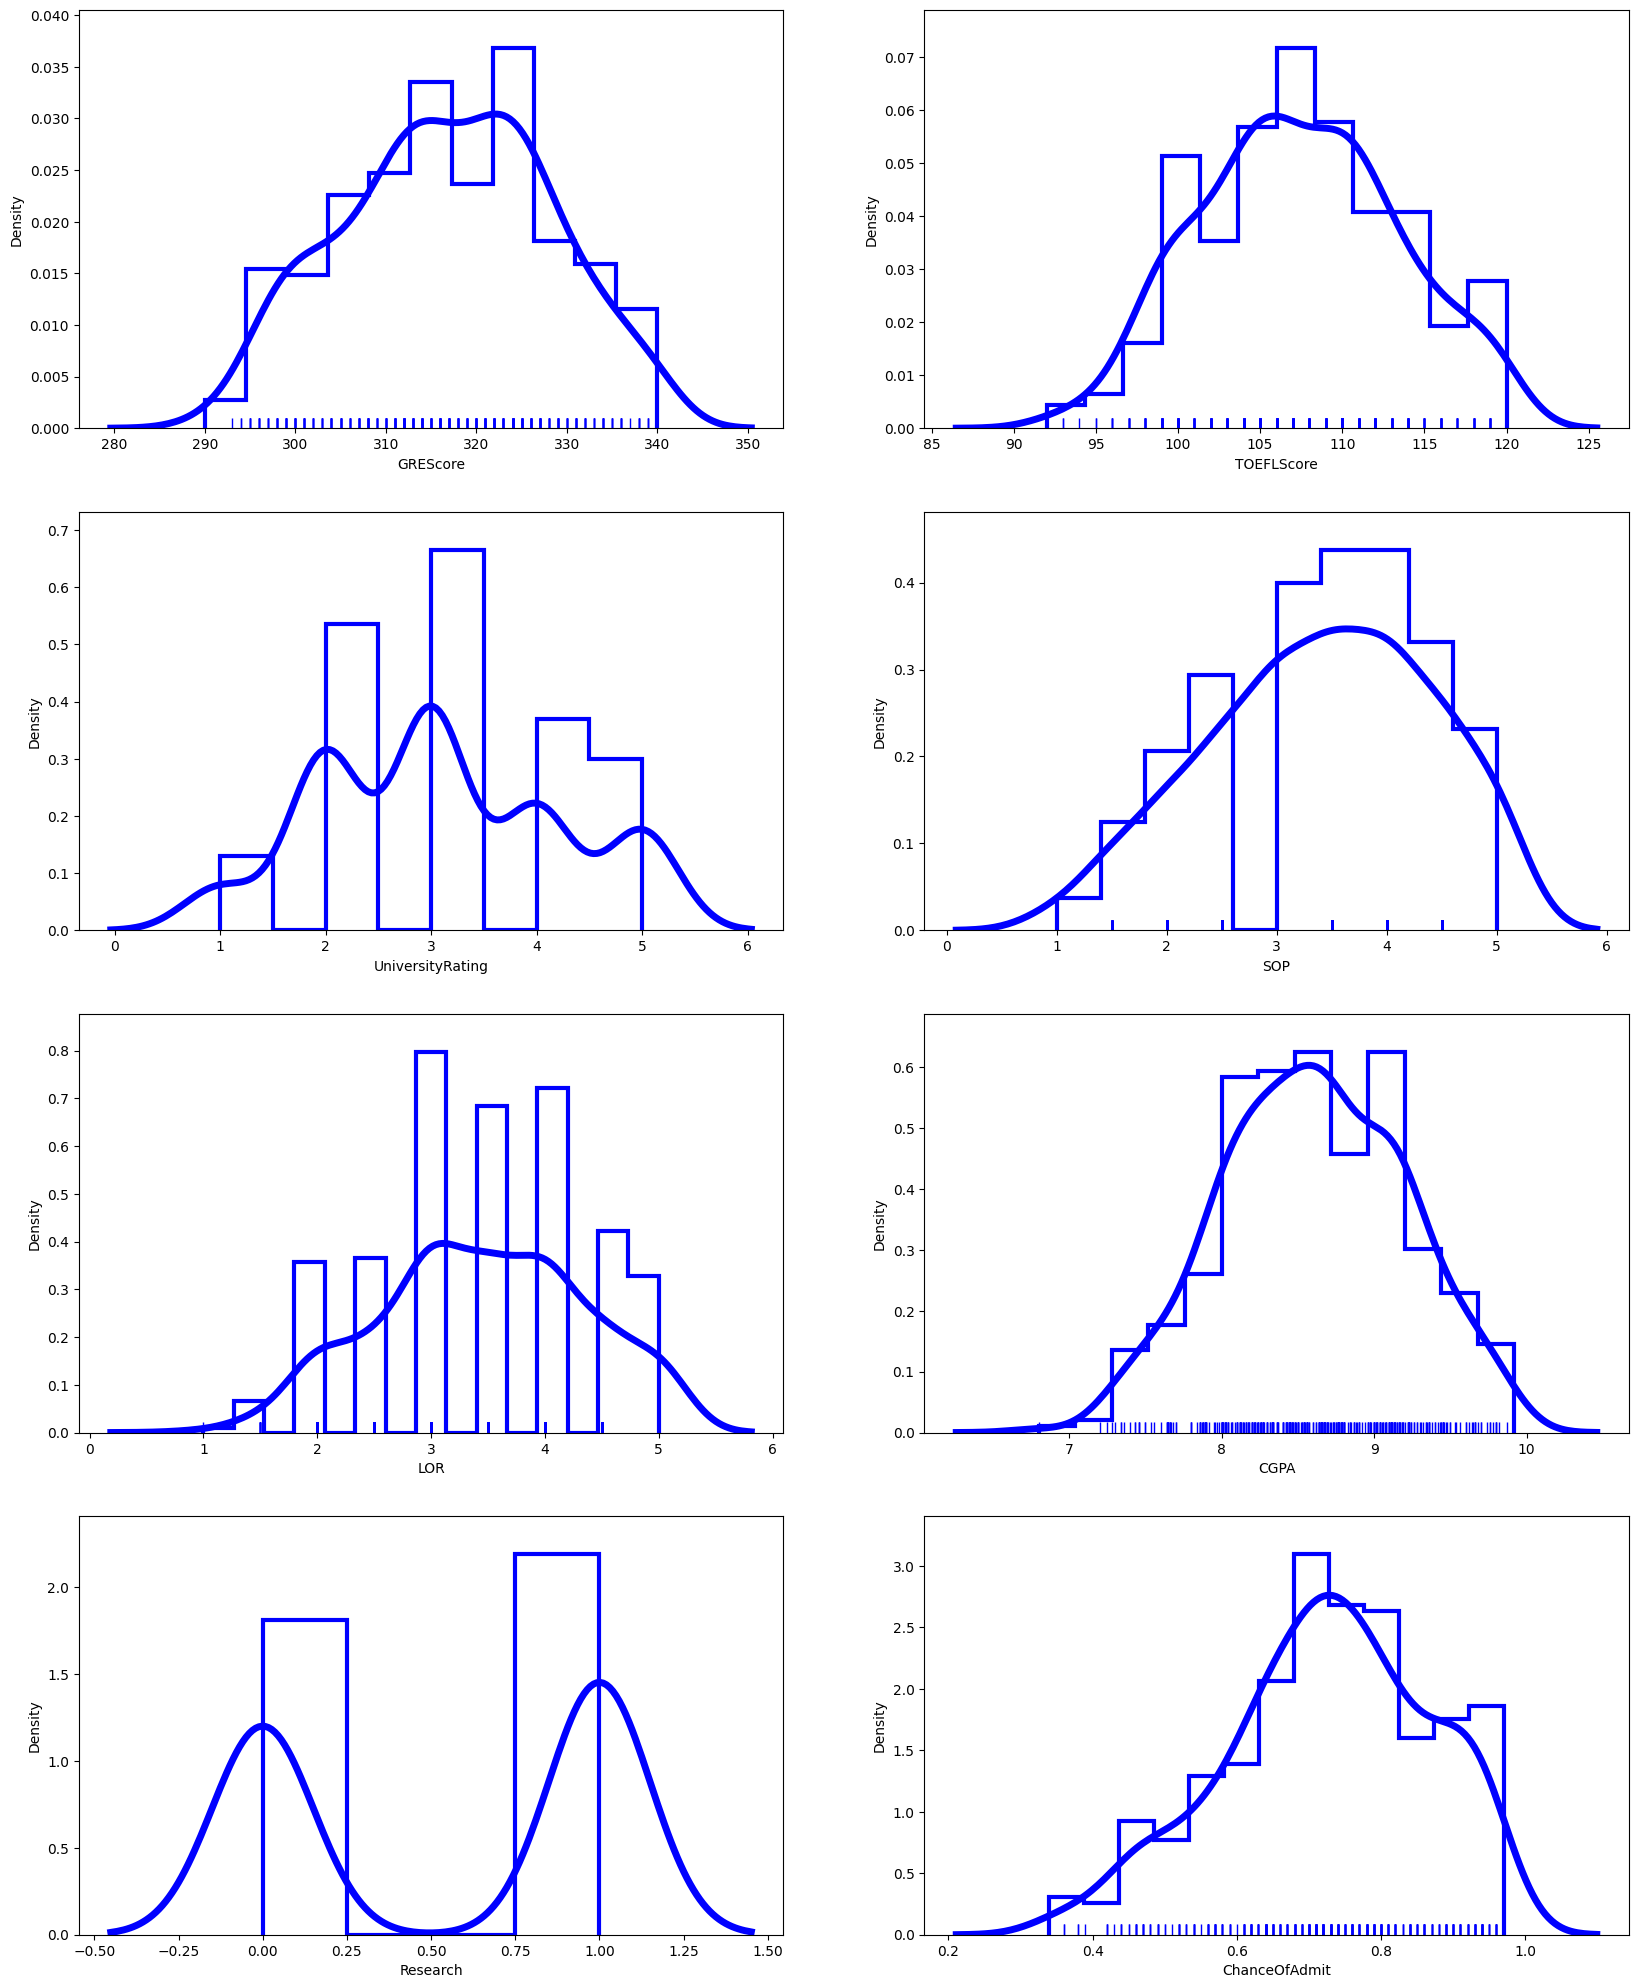

In [ ]:
plt.figure(figsize=(20,25))
i = 0

for item in data_predict.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.distplot(data_predict[item], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "blue", "lw": 5, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(item))
#     sns.distplot(admission_v1[item], kde=True,label="{0}".format(item))
plt.show()

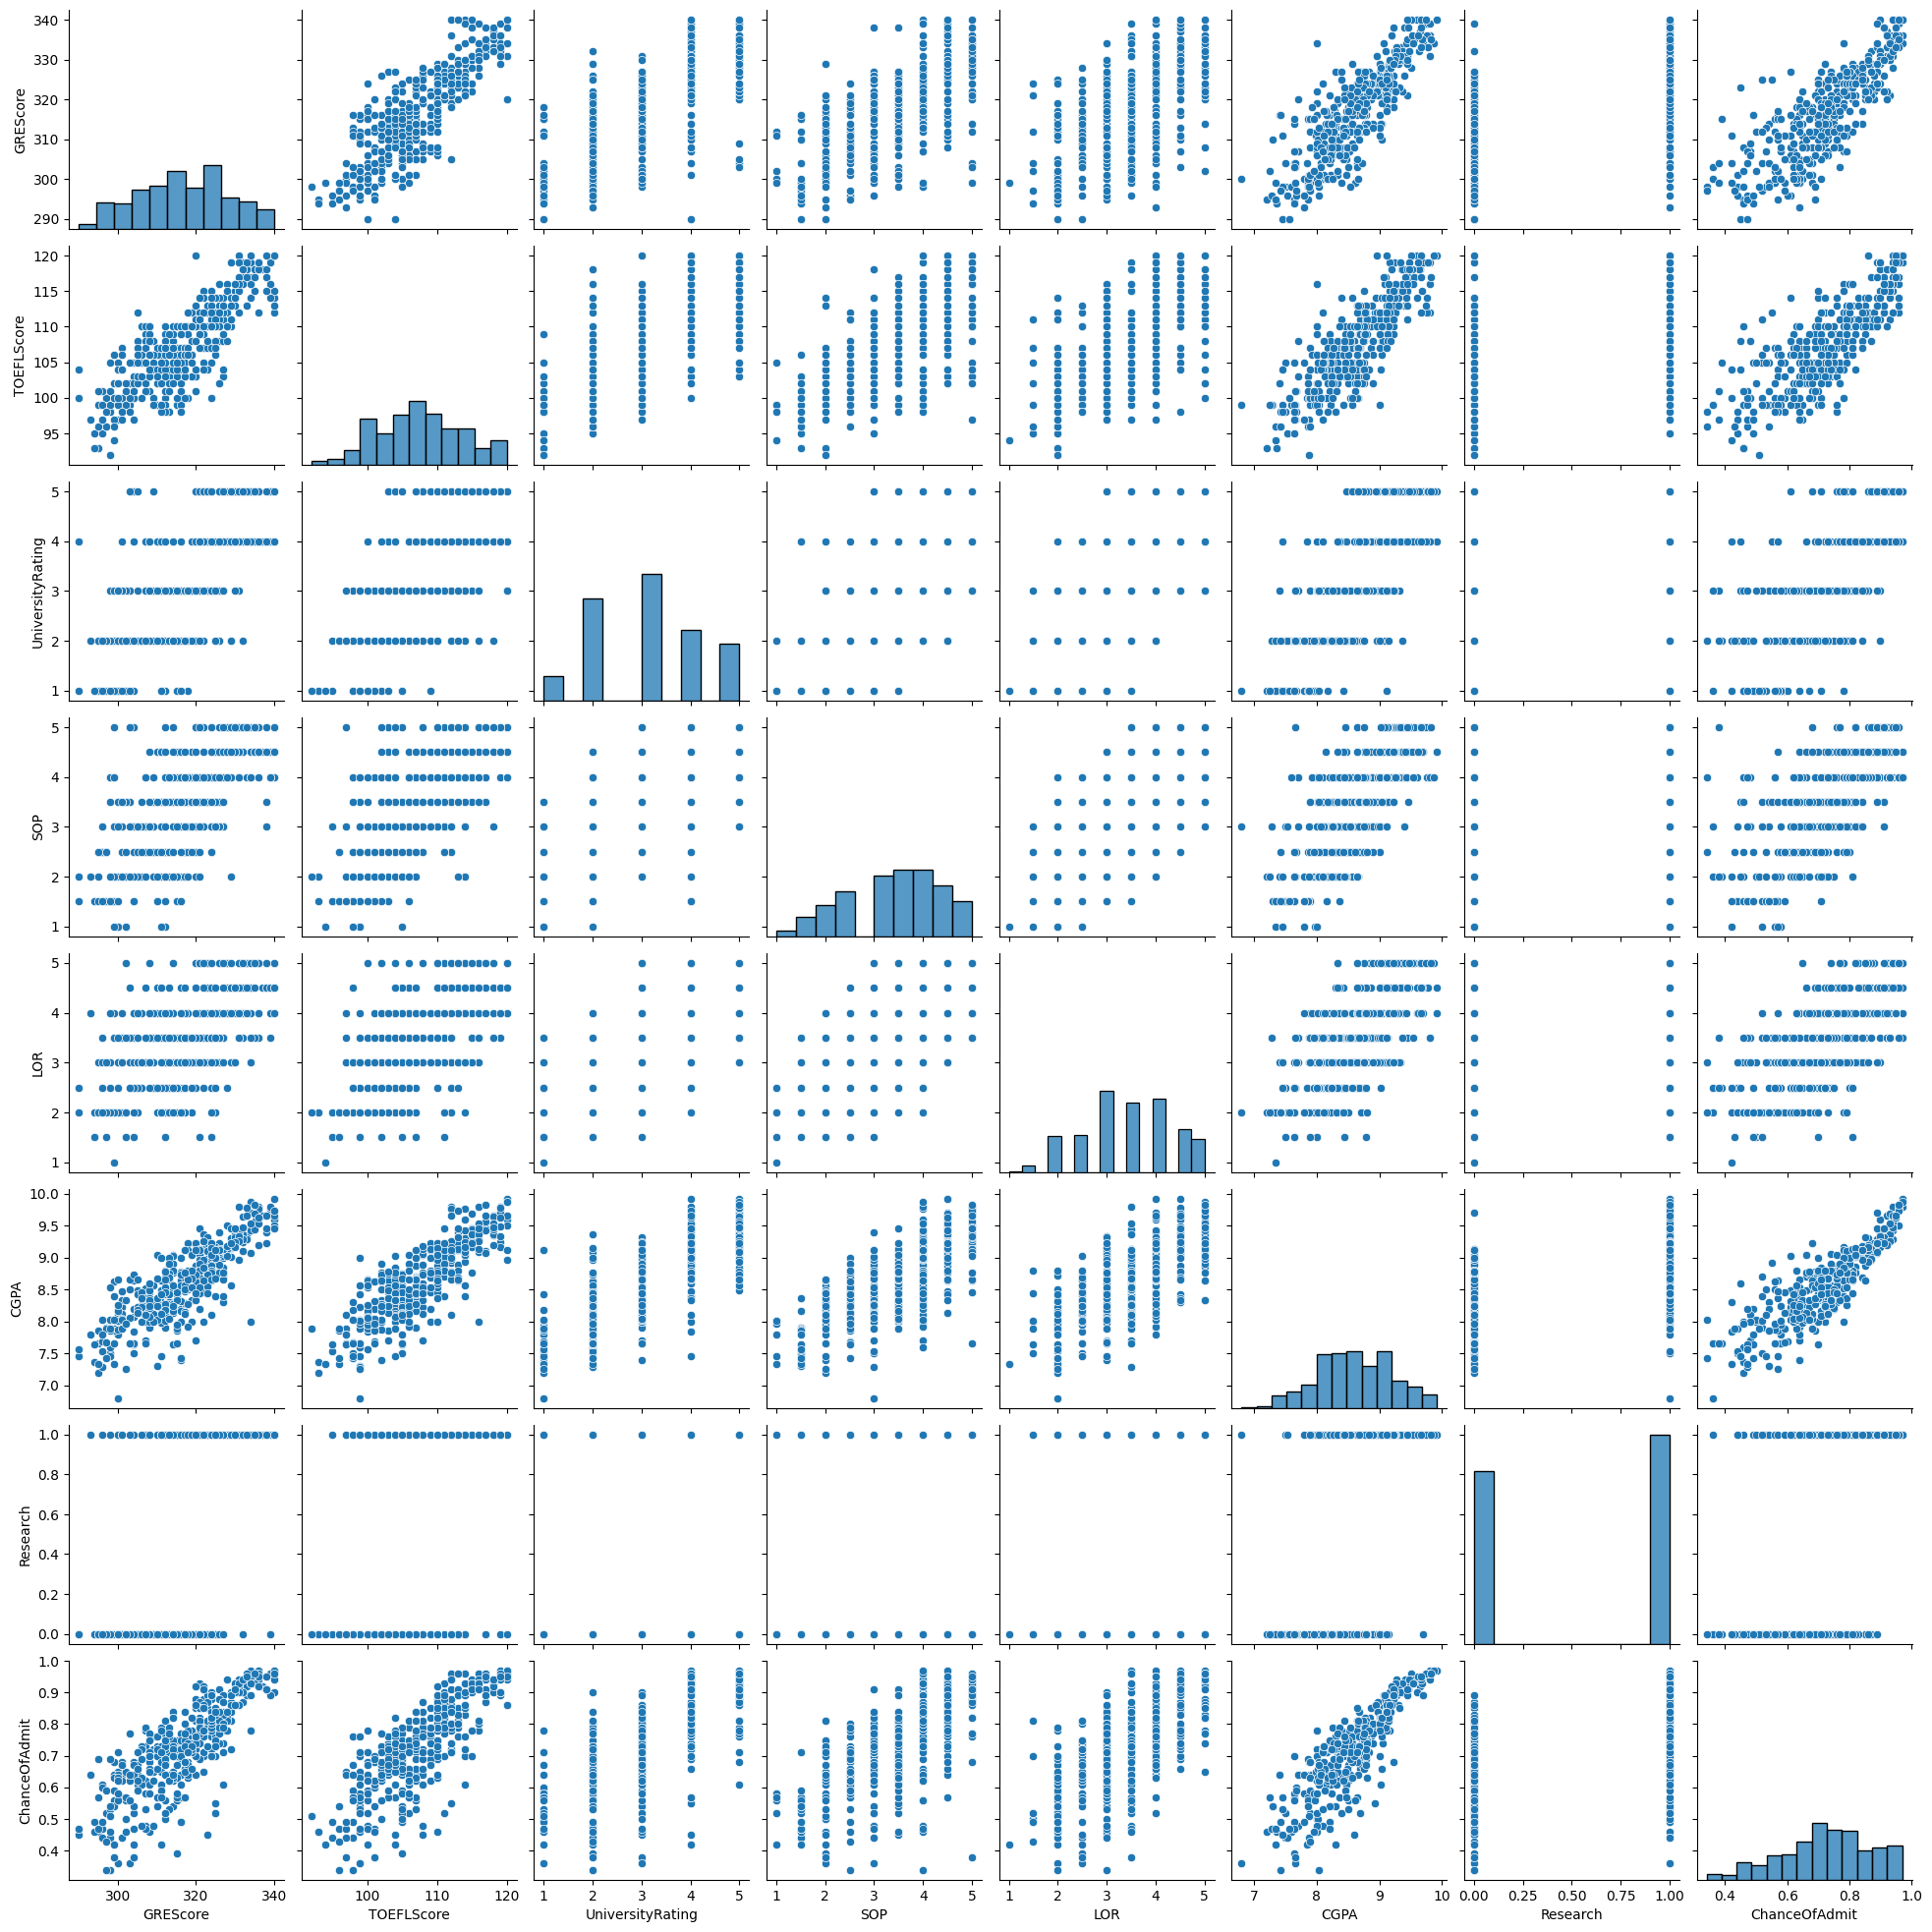

In [ ]:
sns.pairplot(data_predict)
plt.show()

<ipython-input-37-65cfcf416cd3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,i+1)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot b

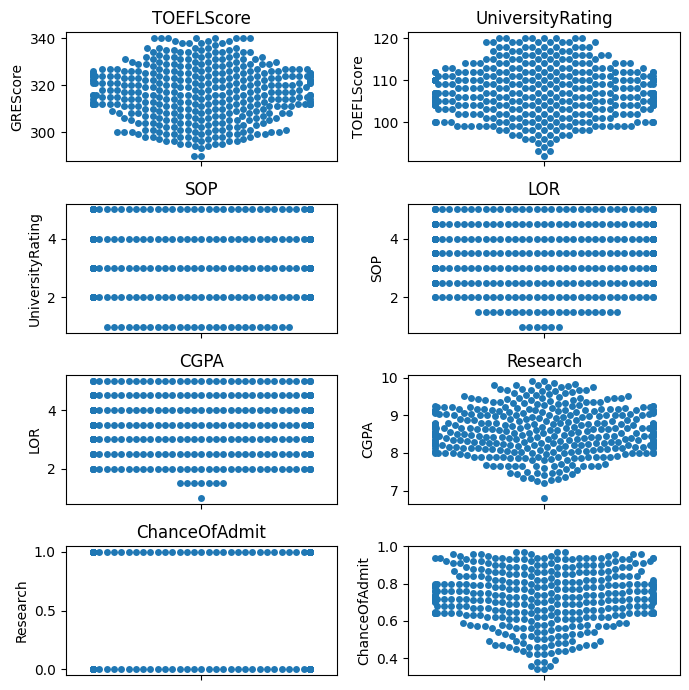

In [ ]:
plt.figure(figsize=(7,7))
for i,col in enumerate(data_predict.columns):
    plt.title(col)
    plt.subplot(4,2,i+1)
    sns.swarmplot(data_predict[col])
    ax,fig=plt.gcf(),plt.gca()
    plt.tight_layout()
plt.show()

In [ ]:
data_predict.iloc[:,:-1].corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
GREScore,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391
TOEFLScore,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858
UniversityRating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000


In [ ]:
dataX=data_predict.drop('ChanceOfAdmit',axis=1)
dataY=data_predict['ChanceOfAdmit']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (320, 7)
X_test (80, 7)
y_train (320,)
y_test (80,)
